In [1]:
from utils.function import *

In [2]:
baseline_df, baseline_accuracy, baseline_mae = run_baseline_easyocr()

In [5]:
baseline_accuracy

{'hoch': 0.3, 'mittel': 0.13138686131386862, 'niedrig': 0.06284454244762955}

In [14]:
# Ergebnisse in DataFrame umwandeln und zählen
df_counts = baseline_df['resolution_category'].value_counts()

# Ausgabe der Sample-Anzahl pro Kategorie
print("Anzahl der Samples pro Auflösungskategorie:")
print(df_counts)


Anzahl der Samples pro Auflösungskategorie:
resolution_category
niedrig    907
mittel     137
hoch        60
Name: count, dtype: int64


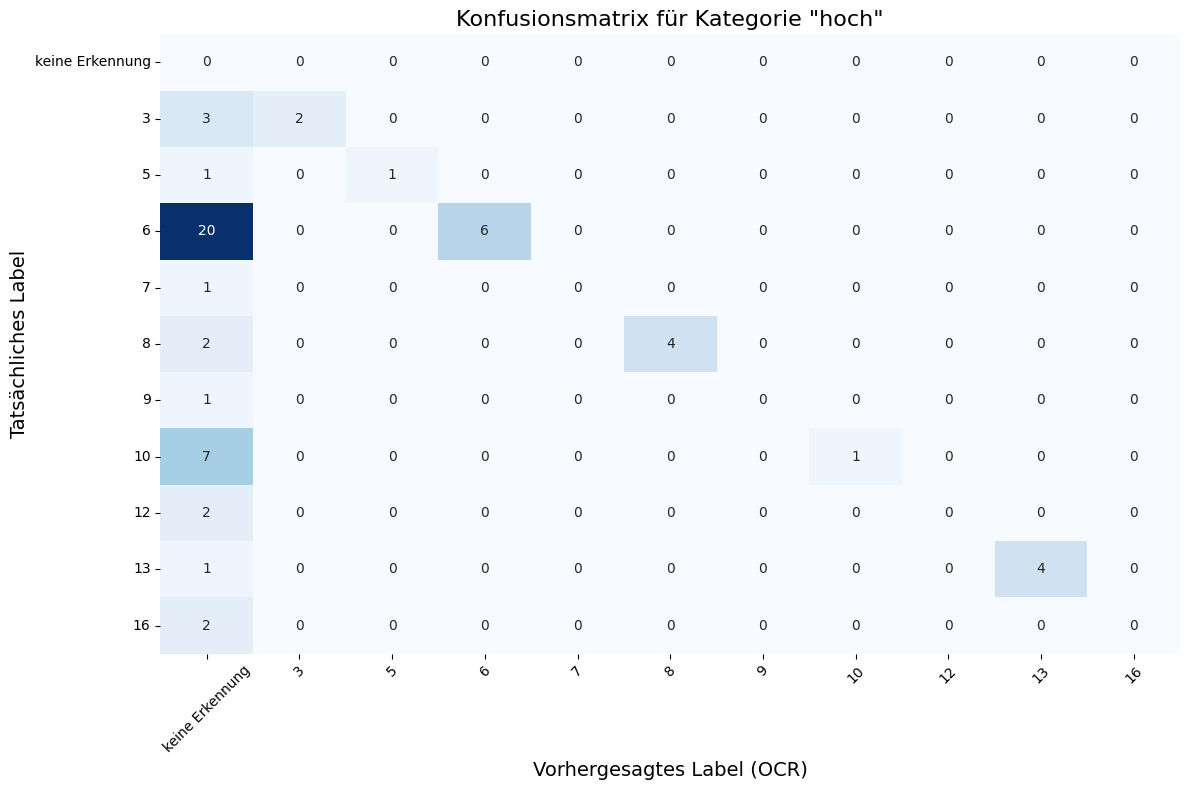

In [7]:
# DataFrame filtern: Nur Kategorie "hoch"
df_hoch = baseline_df[baseline_df['resolution_category'] == 'hoch'].copy()

# NaN-Werte in 'predicted_label' mit eigenem Wert auffüllen (z.B. -1 für "kein Ergebnis")
df_hoch['predicted_label_filled'] = df_hoch['predicted_label'].fillna(-1).astype(int)

# Labels ermitteln (alle vorkommenden Labels, inklusive "kein Ergebnis")
labels = np.sort(df_hoch['true_label'].unique())
if -1 in df_hoch['predicted_label_filled'].values:
    labels = np.insert(labels, 0, -1)  # Füge "-1" am Anfang hinzu, falls vorhanden

# Konfusionsmatrix berechnen
cm = confusion_matrix(
    df_hoch['true_label'], 
    df_hoch['predicted_label_filled'], 
    labels=labels
)

# Labels für die Achsen vorbereiten
label_names = ['keine Erkennung' if label == -1 else str(label) for label in labels]

# Konfusionsmatrix visualisieren
plt.figure(figsize=(12, 8))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=label_names, 
    yticklabels=label_names,
    cbar=False
)
plt.title('Konfusionsmatrix für Kategorie "hoch"', fontsize=16)
plt.xlabel('Vorhergesagtes Label (OCR)', fontsize=14)
plt.ylabel('Tatsächliches Label', fontsize=14)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Nur Fehler in der Kategorie "hoch" filtern
ocr_fehler_hoch = baseline_df[
    (baseline_df['resolution_category'] == 'hoch') & 
    (~baseline_df['correct'])
    # (best_df_results['correct'])
]

# Wichtige Spalten übersichtlich darstellen:
ocr_fehler_hoch = ocr_fehler_hoch[['path', 'true_label', 'predicted_label', 'width', 'height']]

# Ausgabe der Ergebnisse
print("OCR-Fehler der Kategorie 'hoch':")
print(ocr_fehler_hoch.to_string(index=False))

OCR-Fehler der Kategorie 'hoch':
                                                                                                                              path  true_label  predicted_label  width  height
               /home/tguenther/Data/GERALD_v1_5_thomas/cropped_images_speed_sorted/03/K%C3%B6ln_Wuppertal.mp4#t=32.9_Zs_3_03_1.jpg           3              NaN     95      82
          /home/tguenther/Data/GERALD_v1_5_thomas/cropped_images_speed_sorted/03/K%C3%B6ln_Wuppertal.mp4#t=33.133333_Zs_3_03_1.jpg           3              NaN    126      95
           /home/tguenther/Data/GERALD_v1_5_thomas/cropped_images_speed_sorted/03/Werlau-K%C3%B6ln.mp4#t=1357.733333_Zs_3_03_1.jpg           3              NaN     98      82
                   /home/tguenther/Data/GERALD_v1_5_thomas/cropped_images_speed_sorted/05/Koeln-Opladen#t=470.068966_Lf_1_05_1.jpg           5              NaN    111     103
            /home/tguenther/Data/GERALD_v1_5_thomas/cropped_images_speed_sorted/06/Fulda-W%C

In [18]:
# Abgeschnittene Fotos sind ein Problem.

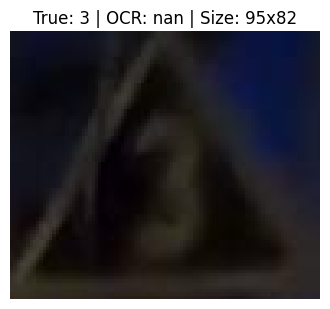

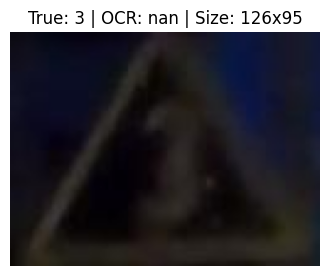

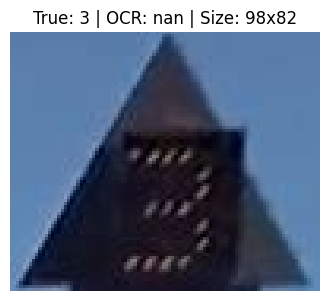

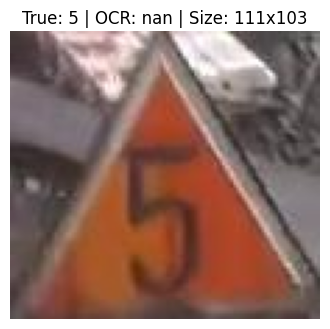

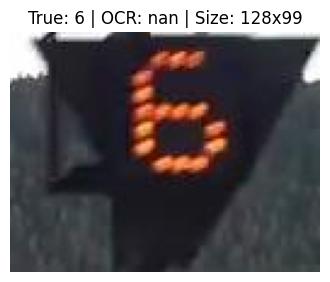

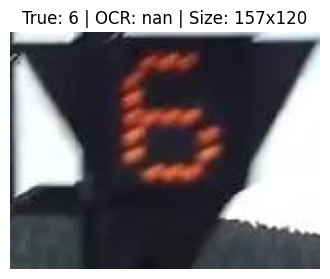

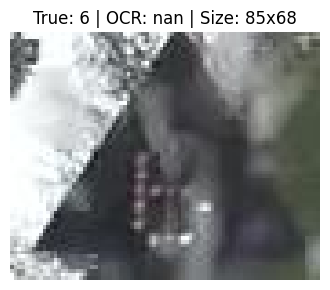

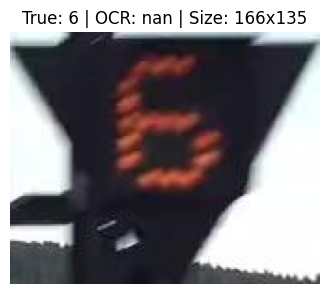

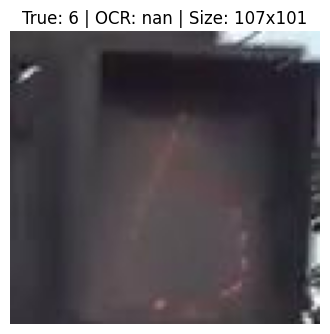

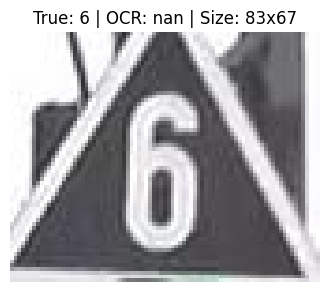

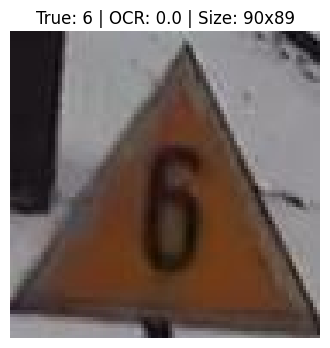

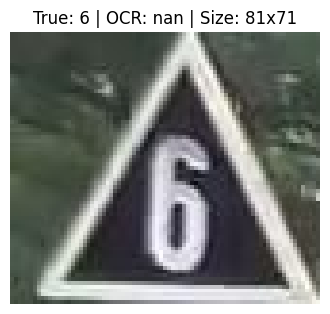

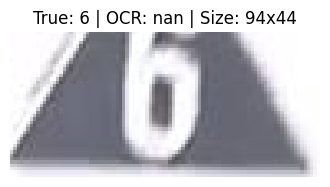

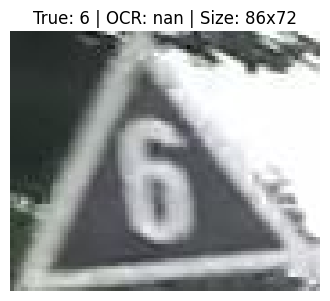

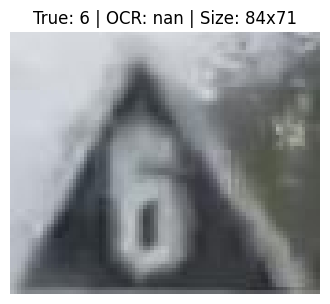

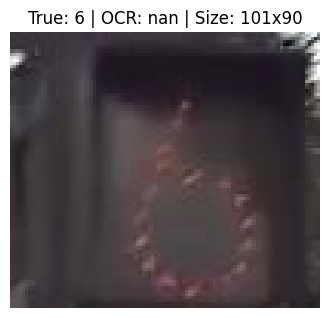

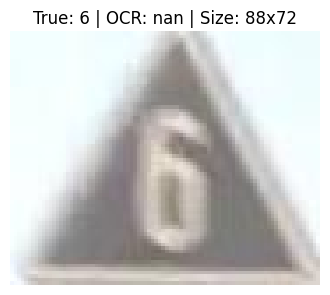

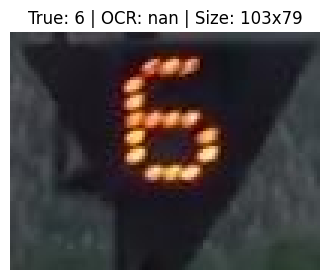

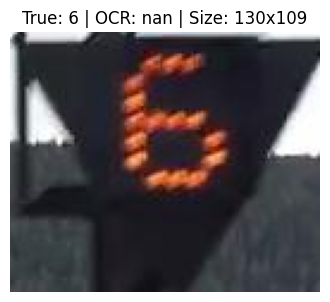

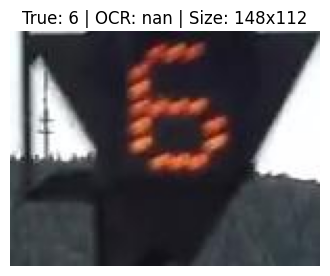

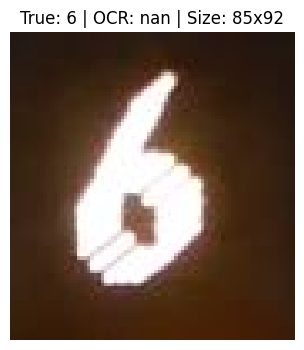

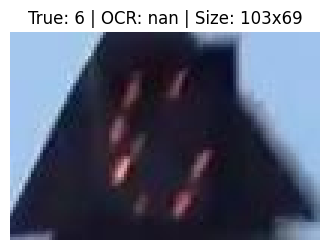

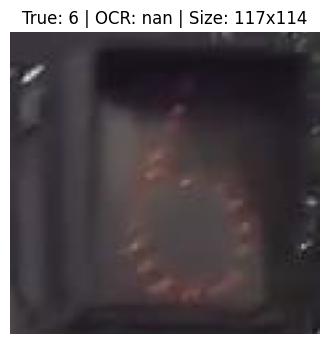

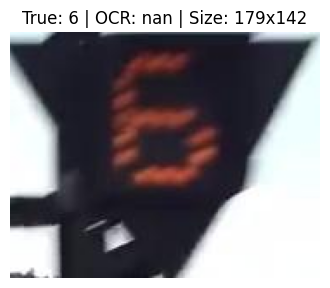

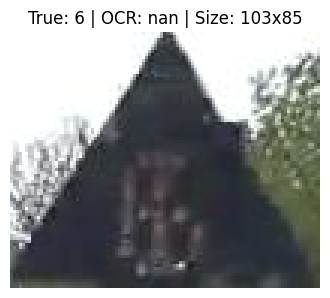

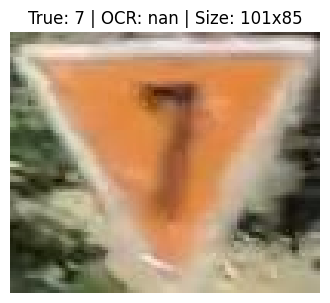

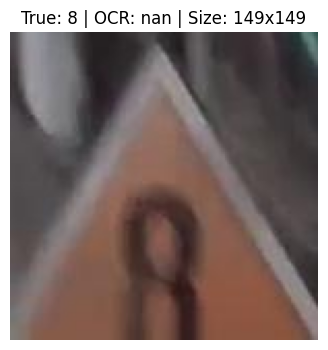

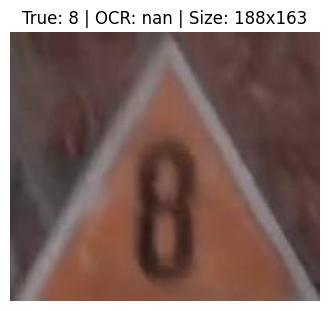

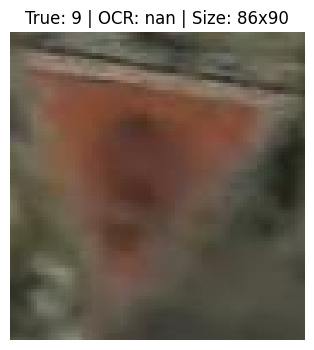

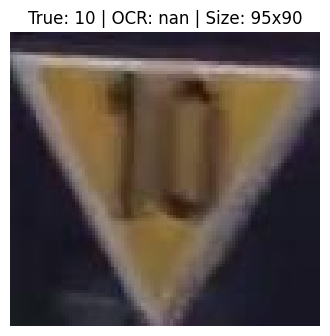

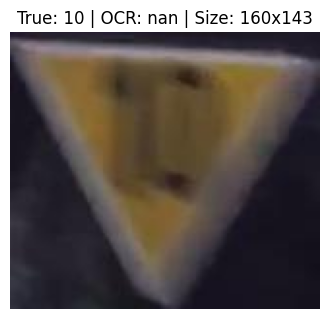

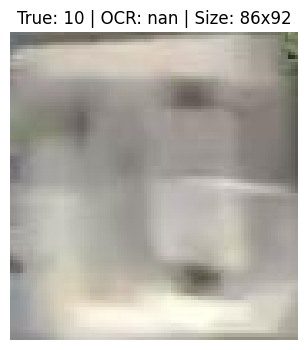

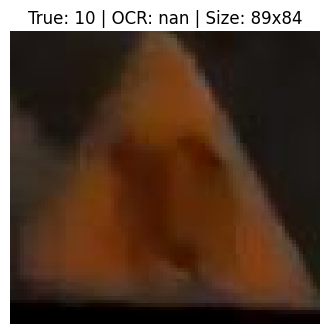

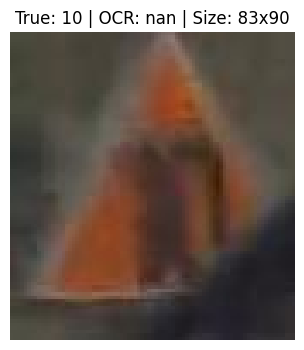

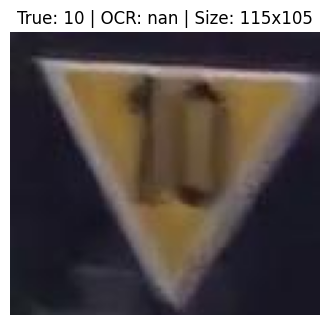

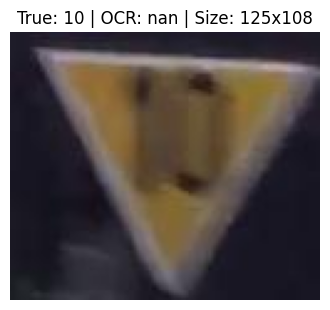

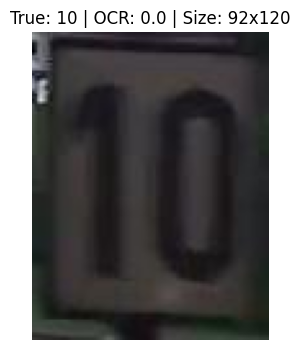

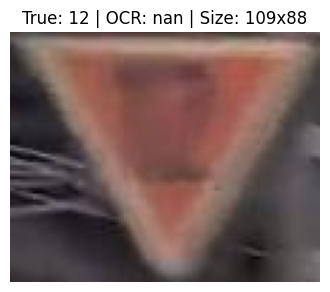

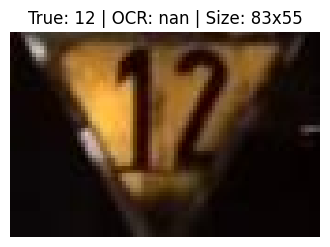

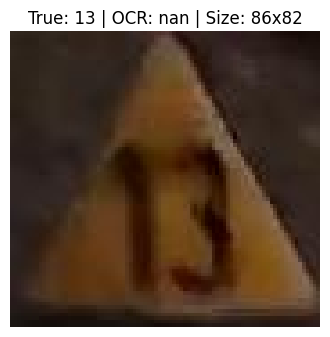

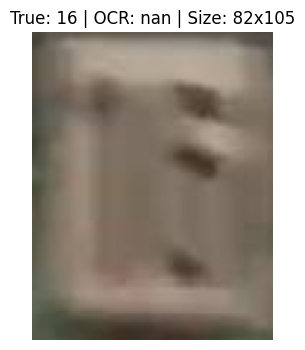

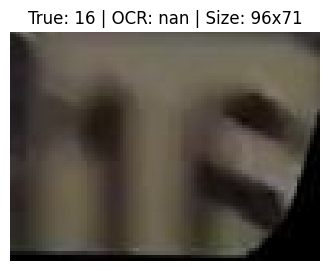

In [16]:
for idx, row in ocr_fehler_hoch.iterrows():
    # Bild laden
    img = cv2.imread(row['path'])
    if img is None:
        continue  # Bild konnte nicht geladen werden

    # Bild vorverarbeiten mit entpackten Parametern
    binary_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Anzeige
    plt.figure(figsize=(4, 4))
    plt.imshow(binary_img, cmap='gray')
    plt.title(f"True: {row['true_label']} | OCR: {row['predicted_label']} | Size: {row['width']}x{row['height']}")
    plt.axis('off')
    plt.show()